In [1]:
using ValueShapes
using ArraysOfArrays
using StatsBase 
using LinearAlgebra
using Statistics
using Distributions 
using IntervalSets

using HCubature
using JLD2
using CPUTime
using KDTree
using LaTeXStrings
using SpecialFunctions

using PyPlot
plt = PyPlot

include("plotting recipes.jl")

corner_plots (generic function with 2 methods)

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 13

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
JLD2.@load "Generated_Data/test-1.jld" samples_ps

1-element Array{Symbol,1}:
 :samples_ps

In [4]:
smpl_par = hcat(samples_ps.samples...)
x = smpl_par[1,:]
y = smpl_par[2,:]
w_o = samples_ps.weights_o
w_r =  samples_ps.weights_r;


In [5]:
[sum(samples_ps.integrals), sqrt(sum((samples_ps.uncertainty).^2))]

2-element Array{Float64,1}:
 0.9276267682346333
 0.0023089357713607654

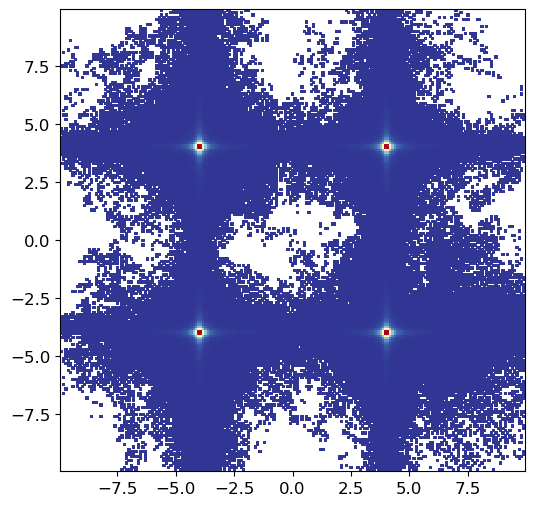

PyObject <matplotlib.collections.QuadMesh object at 0x162bf4f90>

In [6]:
histogram_2D_r = fit(Histogram, (x,y), weights(w_r), nbins=200)
histogram_2D_r = normalize(histogram_2D_r, mode=:probability)

fig, ax = plt.subplots(1,1, figsize=(6, 6))

img = ax.pcolormesh(midpoints(histogram_2D_r.edges[1]), midpoints(histogram_2D_r.edges[2]), replace(histogram_2D_r.weights', 0=>NaN), cmap="RdYlBu_r") #terrain_r  vmin = -0.0001, vmax=maximum_v,

# fig.colorbar(img)

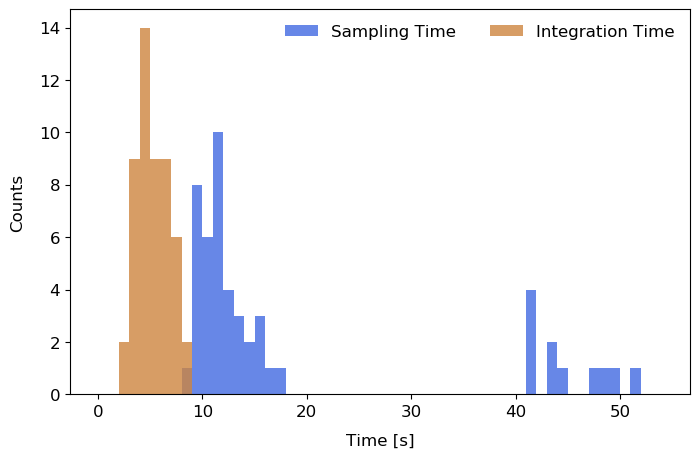

PyObject Text(25.000000000000004, 0.5, 'Counts')

In [7]:
plot_time_histogram(samples_ps)

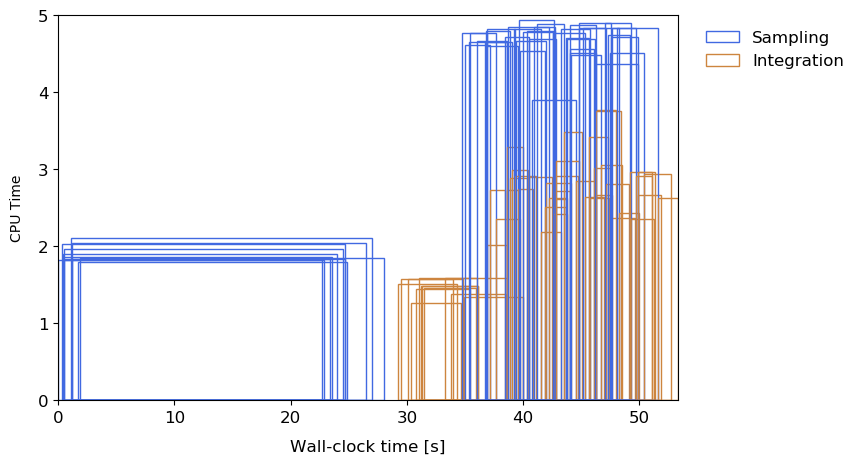

PyObject Text(0.5, 25.000000000000004, 'Wall-clock time [s]')

In [8]:
plot_overlapped_timeline(samples_ps)

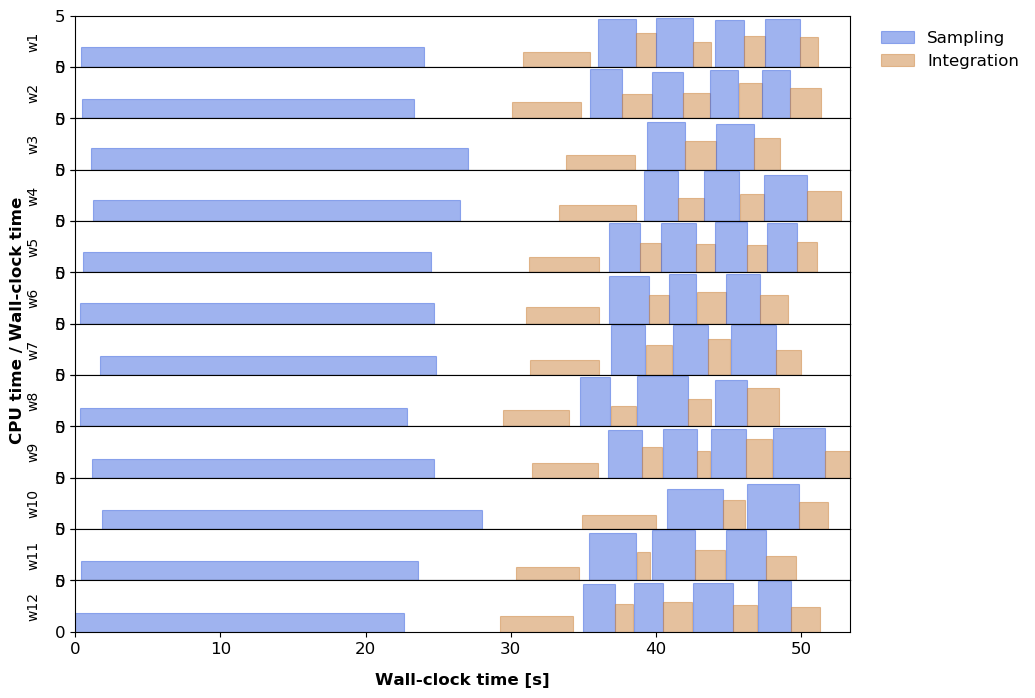

PyObject Text(0.5, 25.00000000000001, 'Wall-clock time [s]')

In [9]:
plot_separated_timeline(samples_ps)

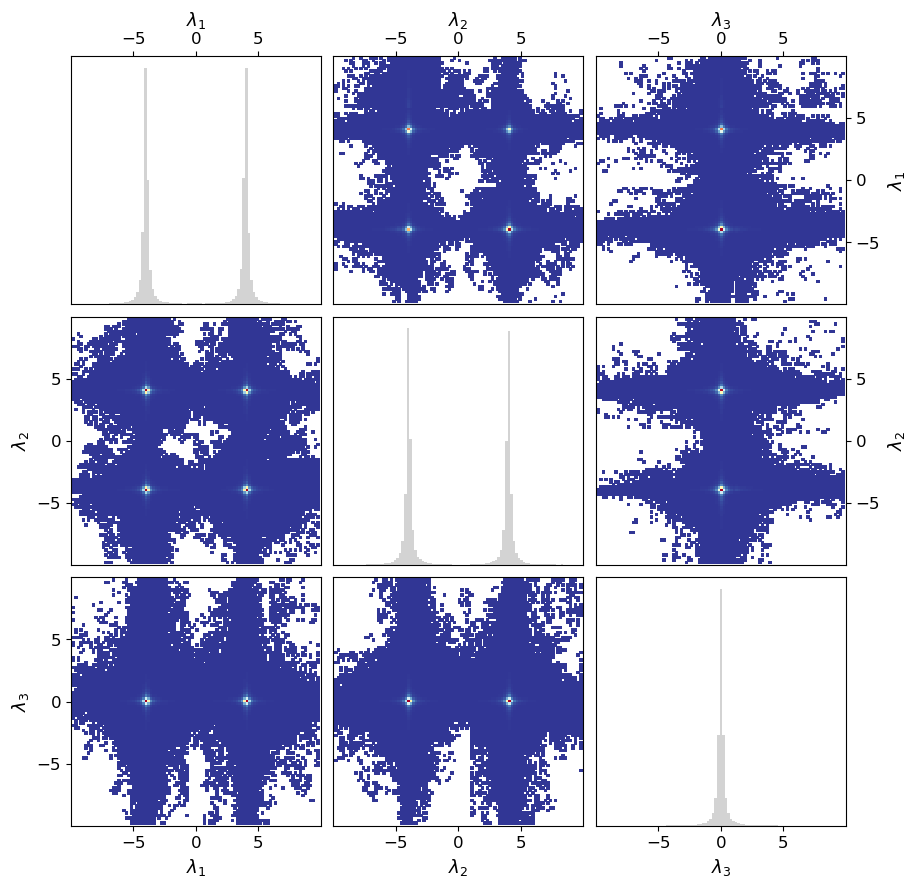

In [10]:
corner_plots(smpl_par, w_r, w_o, 
    [1,2,3], [L"\lambda_1", L"\lambda_2", L"\lambda_3", L"\lambda_4",  L"\lambda_5"], 
    N_bins=100, linewidth=0.6, color="black",
    save_plot=false,
    FILE_NAME = "../../MCMC_publication/fig-f-2-a.png",
    )